In [32]:
#Imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

# Data
url = 'https://raw.githubusercontent.com/atikagondal/Lab-2023-DAVE3625/main/Lab3/data/flight.csv'
df = pd.read_csv(url)
#Print
df

,Unnamed: 0,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest
0,0,2013-1-1 05:40:00,2013-1-1 05:42:00,2013-1-1 09:23:00,2013-1-1 08:50:00,1141,JFK,MIA
1,1,2013-1-1 06:00:00,2013-1-1 05:54:00,2013-1-1 08:12:00,2013-1-1 08:37:00,461,LGA,ATL
2,2,2013-1-1 05:58:00,2013-1-1 05:54:00,2013-1-1 07:40:00,2013-1-1 07:28:00,1696,EWR,ORD
3,3,2013-1-1 06:00:00,2013-1-1 05:55:00,2013-1-1 09:13:00,2013-1-1 08:54:00,507,EWR,FLL
4,4,2013-1-1 06:00:00,2013-1-1 05:57:00,2013-1-1 08:38:00,2013-1-1 08:46:00,79,JFK,MCO
...,...,...,...,...,...,...,...,...
121422,123979,2013-9-30 21:37:00,2013-9-30 21:47:00,2013-9-30 00:30:00,2013-9-30 00:27:00,1371,LGA,FLL
121423,123980,2013-9-30 21:56:00,2013-9-30 21:49:00,2013-9-30 22:45:00,2013-9-30 23:08:00,523,EWR,BOS
121424,123981,2013-9-30 21:13:00,2013-9-30 22:33:00,2013-9-30 01:12:00,2013-9-30 00:30:00,471,EWR,SFO
121425,123982,2013-9-30 20:01:00,2013-9-30 22:35:00,2013-9-30 00:59:00,2013-9-30 22:49:00,1083,JFK,MCO


In [33]:
# Using pd.to_datetime() function from the pandas library to convert the specified columns to datetime object
# Some of the objects might have been stored as strings
# Using "errors='coerce'" to avoid errors from some of the timestamps being < 24:00.
# errors='coerce' puts a NaT value (NaT = dummy var for missing value)
df['datetime_val'] = pd.to_datetime(df['datetime_val'])
df['dep_time'] = pd.to_datetime(df['dep_time'], errors='coerce')
df['arr_time'] = pd.to_datetime(df['arr_time'], errors='coerce')
df['sched_arr_time'] = pd.to_datetime(df['sched_arr_time'], errors='coerce')
df

,Unnamed: 0,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest
0,0,2013-01-01 05:40:00,2013-01-01 05:42:00,2013-01-01 09:23:00,2013-01-01 08:50:00,1141,JFK,MIA
1,1,2013-01-01 06:00:00,2013-01-01 05:54:00,2013-01-01 08:12:00,2013-01-01 08:37:00,461,LGA,ATL
2,2,2013-01-01 05:58:00,2013-01-01 05:54:00,2013-01-01 07:40:00,2013-01-01 07:28:00,1696,EWR,ORD
3,3,2013-01-01 06:00:00,2013-01-01 05:55:00,2013-01-01 09:13:00,2013-01-01 08:54:00,507,EWR,FLL
4,4,2013-01-01 06:00:00,2013-01-01 05:57:00,2013-01-01 08:38:00,2013-01-01 08:46:00,79,JFK,MCO
...,...,...,...,...,...,...,...,...
121422,123979,2013-09-30 21:37:00,2013-09-30 21:47:00,2013-09-30 00:30:00,2013-09-30 00:27:00,1371,LGA,FLL
121423,123980,2013-09-30 21:56:00,2013-09-30 21:49:00,2013-09-30 22:45:00,2013-09-30 23:08:00,523,EWR,BOS
121424,123981,2013-09-30 21:13:00,2013-09-30 22:33:00,2013-09-30 01:12:00,2013-09-30 00:30:00,471,EWR,SFO
121425,123982,2013-09-30 20:01:00,2013-09-30 22:35:00,2013-09-30 00:59:00,2013-09-30 22:49:00,1083,JFK,MCO


In [34]:
# Adjusting the flights that go past midnight:

# Identifying flights going past midnight
#midnight_flights = df['arr_time'] < df['dep_time']

# Adjusting arrival time for flights that have passed midnight
#df.loc[midnight_flights, 'arr_time'] += pd.Timedelta(days=1)

# Using the code from the task description
for index, row in df.iterrows():
    if (row['arr_time'] < row['dep_time']):
        df.loc[index, 'arr_time'] += pd.Timedelta(days=1)
    if (row['sched_arr_time'] < row['dep_time']):
        df.loc[index, 'sched_arr_time'] += pd.Timedelta(days=1)


In [ ]:
# Air time
df['air_time'] = df['dep_time'] - df['arr_time']

# Delay
df['delay'] = df['arr_time'] - df['sched_arr_time']

# Delay as percent:

df['percent_delay'] = (100* df['delay']) / df['air_time']

In [36]:
# Correcting negative air time:
# For every row in df
for index, row in df.iterrows():
    # if air time is negative
    if (row['air_time'].days < 0):
        # Find the row with df.loc
        df.loc[index, 'air_time'] = datetime.timedelta(hours=24)-(row['air_time'] + datetime.timedelta(abs(row['air_time'].days)))

<Axes: >

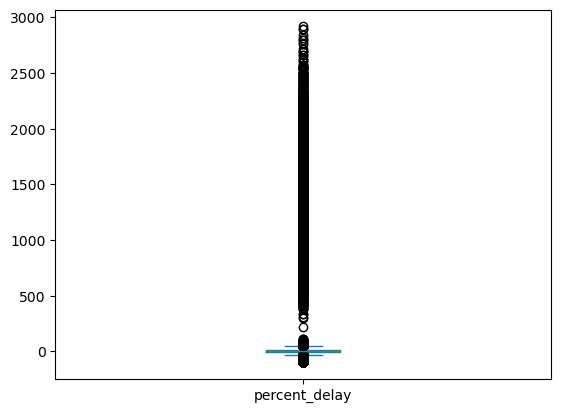

In [37]:
df['percent_delay'].plot.box()

In [38]:
minrow = df['percent_delay'].argmin()

In [39]:
df.iloc[minrow]

Unnamed: 0                       2182
datetime_val      2013-01-07 21:25:00
dep_time          2013-01-07 22:34:00
arr_time          2013-01-07 23:33:00
sched_arr_time    2013-01-07 22:34:00
flight                           1066
origin                            EWR
dest                              BOS
air_time              0 days 00:59:00
delay                 0 days 00:59:00
percent_delay                  -100.0
Name: 2173, dtype: object

In [40]:
from pandas.api.types import is_numeric_dtype
def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    if is_numeric_dtype(df):
        df = df[(df > quant_df.loc[low]) & (df < quant_df.loc[high])]
    return df

<Axes: >

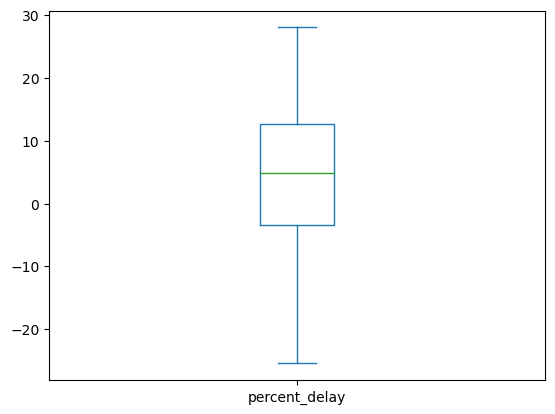

In [42]:
df["percent_delay"] = remove_outlier(df["percent_delay"])
df
df['percent_delay'].plot.box()